In [2]:
# Set up environment

import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

df = pd.read_csv('./WA_Fn-UseC_-HR-Employee-Attrition.csv')

# 1. Introduction.

Many companies are facing the problem of recruiting and retaining talents while at the same time having to deal with talent loss through attrition. Losing talents and employees result in performance losses and can have a long-term negative effect on the companies. Besides, attrition might leave gaps in its execution and human resource team, and causes loss of work team harmony and social goodwill. There are many factors that might result in attribution, issues of salary, lack of career mobility and challenges, working environment, just to name a few. 

In this research, we will look into the data of IBM HR Analytics Employee Attrition & Performance. By studying employee profiles, we would like to answer what factors are more likely to cause attrition, and what potential methods can be applied to reduce attrition rate.


# 2. Hypothesis - part I

We would like to answer the question: “Are male employees at the company more likely to quit the job?” To answer this question, we would study the attrition rate index, and compare it between male employees and female employees at the company. A higher attrition rate would indicate a higher probability to quit.

To answer the question, I designed the following hypothesis:

    Ho: male employees and female employees at the company have the same attrition rate.
    
    Ha: male employees and female employees at the company do NOT have the same attrition rate.


# 3. Data

The data comes from Kaggle, titled “IBM HR Analytics Employee Attrition & Performance”, which can be found at the following link: https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset. 

The dataset consists of 35 columns(variables) and 1471 rows(records). The sample size is large enough. The variables are likely to provide information for a meaningful study. Based on what we are mostly interested in, we might work on variables including “Attrition”, “YearsAtCompany”, “Gender”, “Department”, etc. There are no missing values in the dataset.


In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
# Count records by gender
print(df['Attrition'].groupby(df['Gender']).agg(['count']))
print()
# convert "Yes" and "No" in Attrition to "1" and "0" in Attribution_num
df['Attrition_num'] = df['Attrition'].map(dict(Yes=1, No=0))
df.head(10)

# Compare attrition rate by gender
# print(df[['Attrition_num']].groupby(df['Gender']).mean())
print("Attrition rate of")
print("male employees is: \t{:.4f}".format(df[df.Gender == 'Male']['Attrition_num'].mean()))
print("female employees is: \t{:.4f}".format(df[df.Gender == 'Female']['Attrition_num'].mean()))
print("The difference of the mean from the two samples is: \t{:.4f}".format(df[df.Gender == 'Male']['Attrition_num'].mean()
                                                                           -df[df.Gender == 'Female']['Attrition_num'].mean()))
print()

print('''
the attrition rate of male employees and female employees are both over 10%, 
male employee has higer attrition rate.
''')


        count
Gender       
Female    588
Male      882

Attrition rate of
male employees is: 	0.1701
female employees is: 	0.1480
The difference of the mean from the two samples is: 	0.0221


the attrition rate of male employees and female employees are both over 10%, 
male employee has higer attrition rate.



# 4. Methods

For this analysis I will create two DataFrames, one containing all records of male employees and another for all female employees. 

Since we care about the attrition rate, which is a sample proportion, we will conduct an independent samples t-test between the groups at the two-tail, 95% confidence interval. 

(if we already have the pre-knowledge that the attrition rate in group is higher than another, i.e. we assume male employees have higher attrition rate, then we might consider to conduct one-tailed t-test. In this case, we don't assume such pre-knowledge, so we might as well just perform the default two-tailed t-test)

In [5]:
print(stats.ttest_ind(df[df.Gender == 'Male']['Attrition_num'], df[df.Gender == 'Female']['Attrition_num']))
print('''
Since the p-value is higher than the 5% threshold, 
we cannot reject the null hypothesis
so, the attrition rate between male and female employees are not significantly different
''')

Ttest_indResult(statistic=1.1289761152328313, pvalue=0.25909236414147996)

Since the p-value is higher than the 5% threshold, 
we cannot reject the null hypothesis
so, the attrition rate between male and female employees are not significantly different



In [11]:
# get 95% confidence interval
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

get_95_ci(df[df.Gender == 'Female']['Attrition_num'], df[df.Gender == 'Male']['Attrition_num'])

'The difference in means at the 95% confidence interval (two-tail) is between -0.01584513934587179 and 0.060062826420701716.'

# 5. Results

Based on the feature of attrition variables, I proceeded with the t-test. Based on a p-value of 0.25, I conclud that we CANNOT reject the null that there is no significant difference in means. In other words, there is no significant difference of the attrition rate between male and female employees.

After calculate The 95% confidence interval, the mean difference of attrituion rate between the two groups is in the range (-0.0158, 0.0600)

# 6. Discussion and recommendation

Based on the result, there is no significant difference in attrition rate between male employees and female employees. The company should not reject a candidate over another merely based on their gender when concerning that one has higher probability to quit the job. Even though male employers have higher attrition rate, but such difference between different genders can be merely casued by randomness. 

We might want to look into other variables to find out what factors would cause attrition significantly.

# In the following part, let's test our 2nd hypothesis.

# 2. Hypothesis - part II

A related question, but not the same and would require a different research, would be “Do male employees stay less years at the company?” To answer this question, we would look into “year at the company” index. A smaller value of “year at the company” would indicate an employee would stay less year at the company.

To answer the question, I designed the following hypothesis:

    Ho: the mean “year at the company” value of male employees and female employees at the company are the same.
    
    Ha: the mean “year at the company” value of male employees and female employees at the company are NOT the same.


# 3. Data - part II

same data as part I.

But this time, we will focus on 'Gender', “YearsAtCompany” columns



In [6]:
# Count records by gender
print(df['YearsAtCompany'].groupby(df['Gender']).agg(['count']))
print()

        count
Gender       
Female    588
Male      882



# 4. Methods - part II

For this analysis I still used the two DataFrames, one containing all records of male employees and another for all female employees. 

Since the 'YearsAtCompany' is numerical, we need to first check normality of the variable of interest in the sample dataset, then based on whether they follow normal distribution choose T-test or Kruskal-test.

Male:  DescribeResult(nobs=882, minmax=(0, 37), mean=6.859410430839002, variance=38.50915651921002, skewness=1.9149521259854552, kurtosis=4.588815761171853)
Female: DescribeResult(nobs=588, minmax=(0, 40), mean=7.2312925170068025, variance=36.05203444239705, skewness=1.5224652107714258, kurtosis=2.856456864152511)


Since the distributions of sample are non-formal,
we will conduct Kruskal-test.



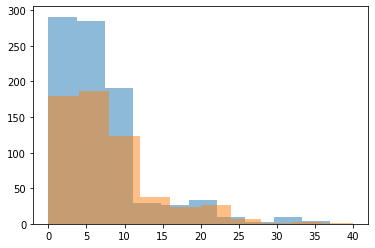

In [7]:
# establish formality
# visually
plt.hist(df[df.Gender == 'Male']['YearsAtCompany'], alpha=0.5)
plt.hist(df[df.Gender == 'Female']['YearsAtCompany'], alpha=0.5)

# discriptive
print("Male: ",  stats.describe(df[df.Gender == 'Male']['YearsAtCompany']))
print("Female:",  stats.describe(df[df.Gender == 'Female']['YearsAtCompany']))
print()

print('''
Since the distributions of sample are non-formal,
we will conduct Kruskal-test.
''')


In [8]:
stats.kruskal(df[df.Gender == 'Male']['YearsAtCompany'], df[df.Gender == 'Female']['YearsAtCompany'])

KruskalResult(statistic=2.613132951059804, pvalue=0.10598219738050443)

In [12]:
# get 95% confidence interval

get_95_ci(df[df.Gender == 'Female']['YearsAtCompany'], df[df.Gender == 'Male']['YearsAtCompany'])

'The difference in means at the 95% confidence interval (two-tail) is between -1.006916517497313 and 0.26315234516171226.'

# 5. Results - part II

Since the two sample sets are non-formal, I proceeded with the Kruskal-test, which works well for A/B test with non-formal distribution samples. Based on a p-value of 0.11, I conclud that we CANNOT reject the null that there is no significant difference in means of variable of interest. In other words, there is no significant difference of the mean "year work at the company" between male and female employees.

After calculate The 95% confidence interval, the mean difference of "year at company" between the two groups is in the range (-1.0069, 0.2632)

# 6. Discussion and recommendation - part II

Based on the result, there is no significant difference in the mean "year work at the company" between male and female employees. Gender should not be the reason for hiring or promotion if one assumes that male employees are more likely to quit, or vice versa, because such assumption is not necessarily true.  

Again, we might want to look into other variables to find out what factors would cause attrition significantly.


# 7. What could possibly went wrong?

When conducting A/B test, we assume that the samples have everything else the same except the control variables. In our test, it means the male employees and female employees are the same except the gender. But this might not be necessarily true and can bring bias to the experiment. Consider the scenario that, the male employee group has more young people, who are actually more likely to quit. While the female group has more employees feeling more stressed, who are more likely the group. These two factors might “average out” the effect between male and female sample groups, and that’s why there is no significant difference between the two sample groups. To test whether such influences exist, we can conduct A/B test to exam whether the two sample groups are significant in age, stress level, and other variables of interest.

# 8. What other changes can be made in the data collection process, if we can collect new data in the domain?

The “percentage salary hike” variable is just one value. Salary hike opportunity can be an important factor to decrease attrition rate. For instance, if the employee got salary hike for more once, it would be helpful to provide information including when and how much the employee got salary hike each time.